The dataset used in this project is [Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats) from Kaggle.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Run this cell only once

# !unzip '/content/drive/MyDrive/Projects/Cats&DogsClassifier/train.zip'
# !unzip '/content/drive/MyDrive/Projects/Cats&DogsClassifier/test.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test/5499.jpg           
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating: test/5512.jpg           
  inflating: test/5513.jpg           
  inflating: test/5514.jpg           
  inflating: test/5515.jpg           
  inflating: test/5516.jpg           
  inflating: test/5517.jpg           
  inflating: test/5518.jpg           
  inflating: test/5519.jpg           
  inflating: test/552.jpg            

In [ ]:
import os
import shutil

os.chdir('/content/drive/MyDrive/Projects/Cats&DogsClassifier')
print(os.getcwd())

# Move the files

# shutil.move('/content/train','/content/drive/MyDrive/Projects/Cats&DogsClassifier')
# shutil.move('/content/test','/content/drive/MyDrive/Projects/Cats&DogsClassifier')

print(os.listdir('.'))

/content/drive/MyDrive/Projects/Cats&DogsClassifier
['test.zip', 'train.zip', 'Cats&DogsClassifier.ipynb', 'train', 'test']


Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import shutil

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

os.chdir('/content/drive/MyDrive/Projects/Cats&DogsClassifier')

In [ ]:
for _ , _ , filenames in os.walk('.'):
    for filename in filenames:
        if filename[-3:]=='zip':
            os.remove(filename)

print(os.listdir('.'))

['Cats&DogsClassifier.ipynb', 'train', 'test']


Basic Preprocessing

In [ ]:
print('No. of train images:',len(os.listdir('./train')))
print('No. of test images:',len(os.listdir('./test')))

No. of train images: 25000
No. of test images: 12500


In [ ]:
cats = len([files for files in os.listdir('./train') if 'cat' in files])
dogs = len([files for files in os.listdir('./train') if 'dog' in files])

print('No. of cats in train set',cats)
print('No. of dogs in train set',dogs)

No. of cats in train set 12500
No. of dogs in train set 12500


In [ ]:
base_dir = 'data/'
dirs = ['train','val','test']
sub_dirs = ['cats','dogs']

for dir in dirs:
    dir = os.path.join(base_dir,dir)
    os.makedirs(dir,exist_ok=True)

    for sub_dir in sub_dirs:
        sub_dir = os.path.join(dir,sub_dir)
        os.makedirs(sub_dir,exist_ok=True)

In [ ]:
total_images = cats
split = {'train':0.7, 'val':0.3}

for dir in dirs[:2]:
    print(int(split[dir]*total_images))

8750
3750


In [ ]:
split_size = 0.7

split = {'train':(0,int(split_size*total_images)),'val':(int(split_size*total_images),total_images)}

# Run the below commented part only once
# for category in sub_dirs:
#     for dir in dirs[:2]:
#         files = ['{}.{}.jpg'.format(category[:-1],i) for i in range(*split[dir])]

#         for filenames in files:
#             src = os.path.join('./train',filenames)
#             dst = os.path.join(base_dir,dir,category,filenames)
#             shutil.copy(src,dst)

print('Train Validation Complete')

Train Validation Complete


In [ ]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

# Directory with training cats/dogs pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')

# Directory with validation cats/dogs pictures
val_cat_dir = os.path.join(val_dir,'cats')
val_dog_dir = os.path.join(val_dir,'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cat_dir)
train_dog_fnames = os.listdir(train_dog_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.4.jpg', 'cat.5.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg', 'dog.4.jpg', 'dog.5.jpg', 'dog.6.jpg', 'dog.7.jpg', 'dog.8.jpg', 'dog.9.jpg']


In [ ]:
print('Total training cat images:',len(os.listdir(train_cat_dir)))
print('Total training dog images:',len(os.listdir(train_dog_dir)))

print('Total validation cat images:',len(os.listdir(val_cat_dir)))
print('Total validation dog images:',len(os.listdir(val_dog_dir)))

Total training cat images: 8750
Total training dog images: 8750
Total validation cat images: 3750
Total validation dog images: 3750


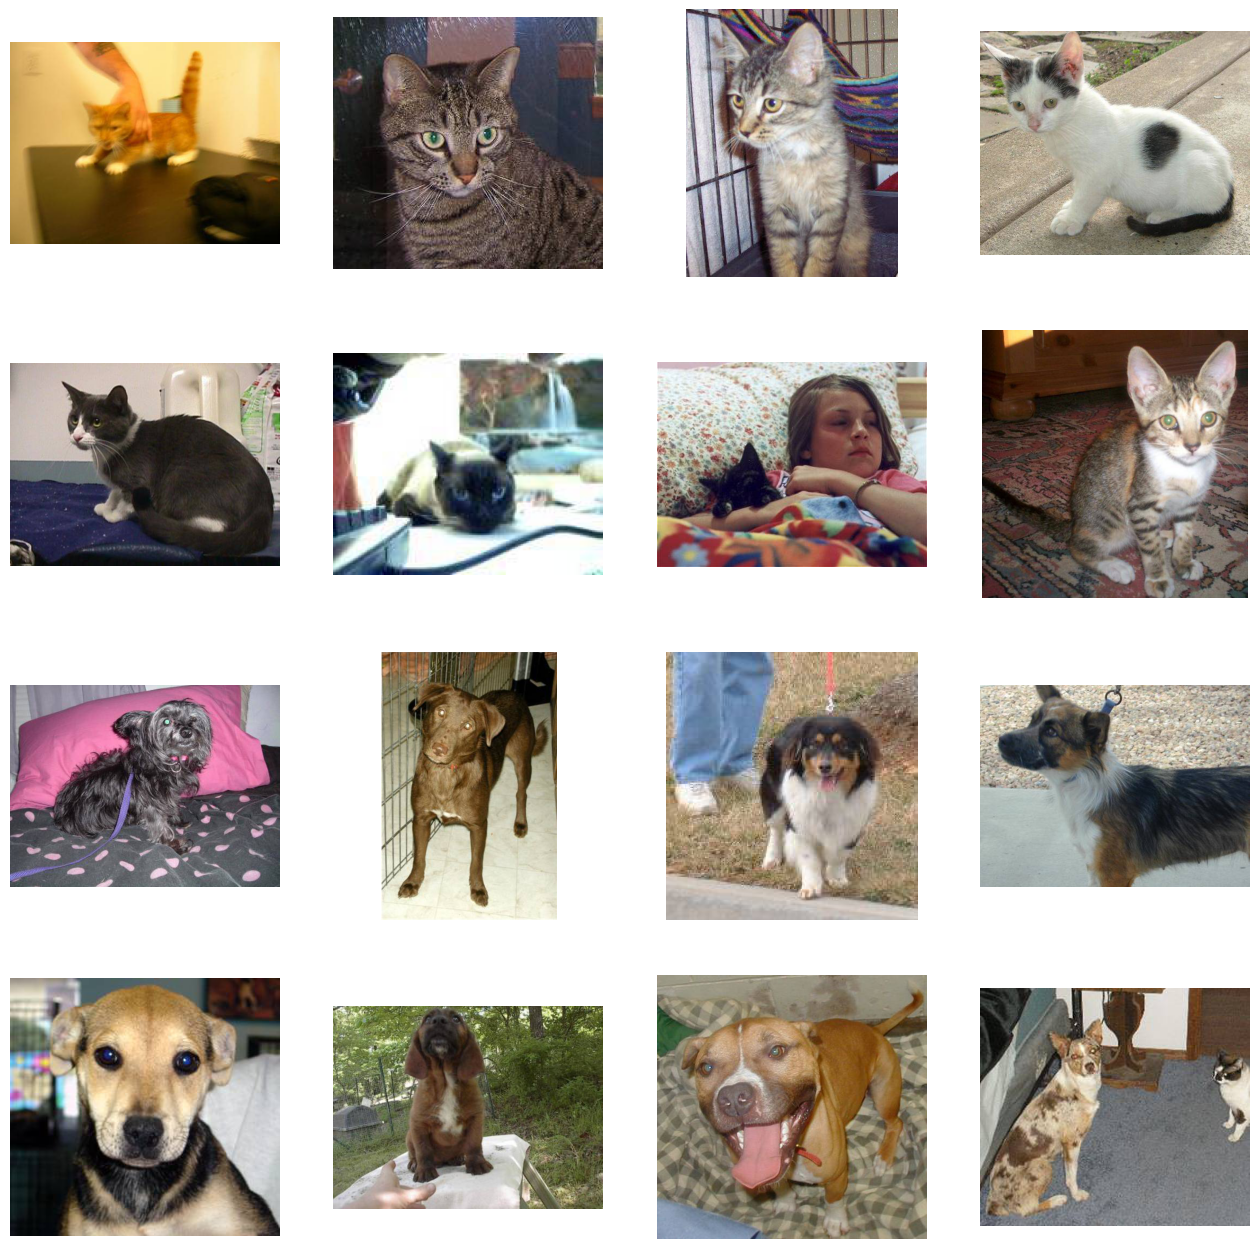

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16,16)

pic_idx = 8

cat_pic = [os.path.join(train_cat_dir,fname) for fname in train_cat_fnames[pic_idx-8:pic_idx]]
dog_pic = [os.path.join(train_dog_dir,fname) for fname in train_dog_fnames[pic_idx-8:pic_idx]]

for i, img_path in enumerate(cat_pic+dog_pic):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')

Creating the actual model

In [ ]:
model = Sequential()

model.add(Conv2D(256,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 256)     7168      
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 128)     295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       147584    
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = datagen.flow_from_directory(train_dir,
                                              batch_size=20,
                                              class_mode ='binary',
                                              target_size=(150,150))
validation_generator = datagen.flow_from_directory(val_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size = (150,150))

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


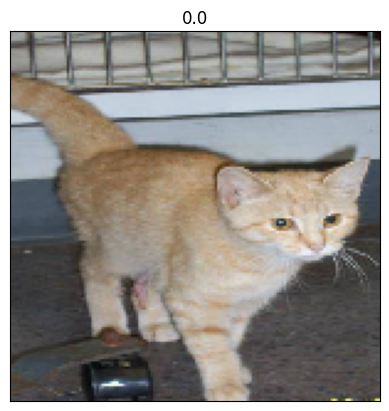

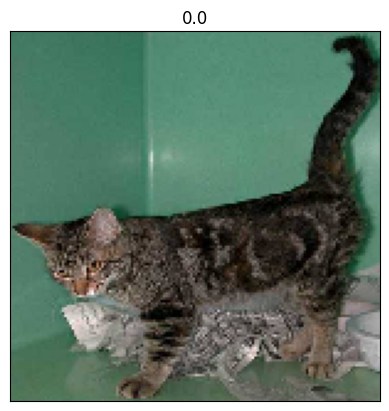

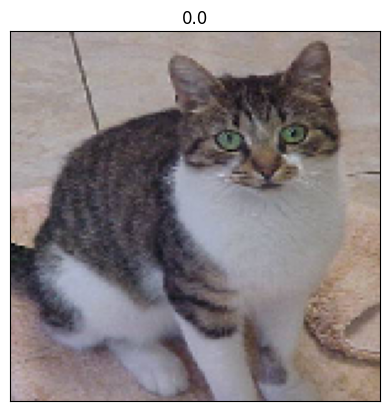

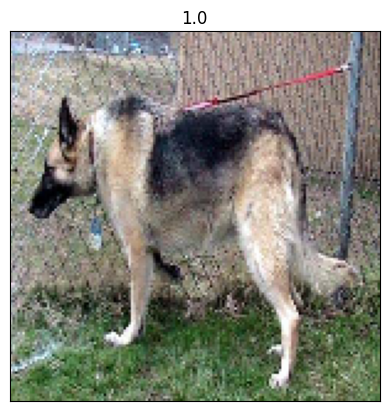

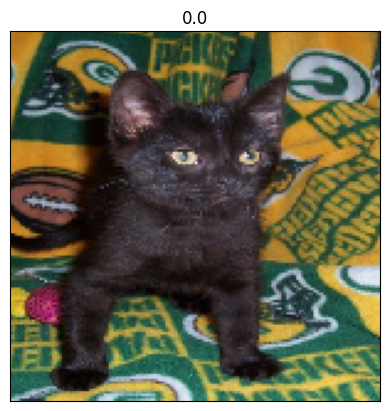

In [ ]:
for _ in range(5):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.title(label[0])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch=100,
                    epochs=50,
                    validation_steps = 50,
                    verbose=1)

Epoch 1/50
100/100 [==============================] - 25s 237ms/step - loss: 0.6925 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.4880
Epoch 2/50
100/100 [==============================] - 21s 207ms/step - loss: 0.6874 - accuracy: 0.5330 - val_loss: 0.6656 - val_accuracy: 0.6340
Epoch 3/50
100/100 [==============================] - 21s 213ms/step - loss: 0.6735 - accuracy: 0.5840 - val_loss: 0.6407 - val_accuracy: 0.6620
Epoch 4/50
100/100 [==============================] - 20s 203ms/step - loss: 0.6472 - accuracy: 0.6160 - val_loss: 0.6327 - val_accuracy: 0.6240
Epoch 5/50
100/100 [==============================] - 21s 214ms/step - loss: 0.6333 - accuracy: 0.6345 - val_loss: 0.5915 - val_accuracy: 0.6830
Epoch 6/50
100/100 [==============================] - 21s 212ms/step - loss: 0.5906 - accuracy: 0.6775 - val_loss: 0.6122 - val_accuracy: 0.6640
Epoch 7/50
100/100 [==============================] - 22s 215ms/step - loss: 0.5836 - accuracy: 0.7030 - val_loss: 0.5840 - val_ac

In [ ]:
def display(img):
    plt.imshow(img)
    plt.axis('off')
    if classes[0]!=0:
        plt.title('It is a dog')
    else:
        plt.title('It is a cat')

    plt.show()

Predicting new images

Saving 3.jpg to 3.jpg
1/1 [==============================] - 0s 396ms/step
--------------------------------------------------


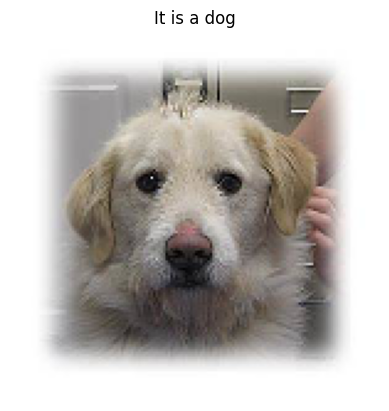

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():

    path = '/content/drive/MyDrive/Projects/Cats&DogsClassifier/test/' + fn
    img = image.load_img(path,target_size=(150,150))

    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])

    classes = model.predict(images,batch_size=10)
    print('-----'*10)
    display(img)

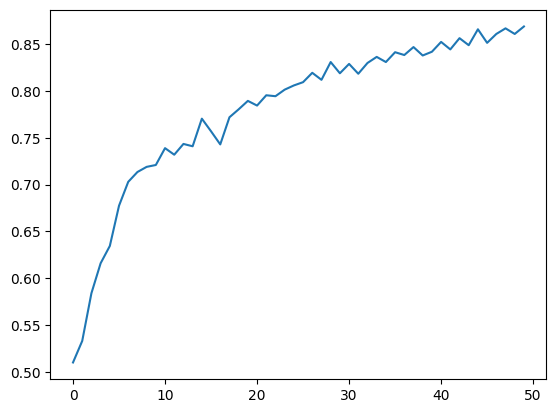

In [ ]:
plt.plot(history.history['accuracy']);